# Bagging and Pasting

* source : https://excelsior-cjh.tistory.com/166

이번에 알아볼 또 다른 방법으로는 하나의 알고리즘을 사용하지만 학습 데이터셋을 랜덤하게 추출하여 모델(분류기)을 각각 다르게 학습시키는 방법이다.
학습 데이터셋에서 랜덤하게 추출할 때, **중복을 허용**하는 방식을 **Bagging**이라고 하고, 이와 반대로 **중복을 허용하지 않는** 샘플링 방식을 **Pasting**이라고 한다.

## Bagging

Scikit-Learn은 배깅과 페이스팅을 간편하게 사용할 수 있도록 분류일 경우에는 BaggingClassifier를 회귀일 경우 BaggingRegressor를 제공한다.

아래의 예제는 moons 데이터셋을 BaggingClassifier를 이용해 500개의 Decision tree 모델을 만들어 Bagging을 적용한 앙상블 학습을 한 예제이다.

In [2]:
# Load data
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

먼저 Bagging을 이용한 앙상블 학습이 얼마나 더 성능이 좋은지 비교하기 위해, 단 하나의 Decision Tree를 사용한 경우와 Bagging을 이용해 500개의 Decision Tree을 만들어 비교해보자.

### Classification using only one decision tree

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred_tree))

Accuracy = 0.856


### Ensemble using bagging method

이번에는 BaggingClassifier를 이용하여 500개의 Decision tree을 만들고 Soft voting 방식으로 결과를 확인해 보자.

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.904


* 위에서 확인할 수 있듯이 Bagging을 이용한 Ensemble 방법이 정확도가 5%나 더 좋게 나온 것을 확인할 수 있다. 
* 아래의 그림은 하나의 Decision tree에 대한 Decision boundary와 Bagging을 이용한 Ensemble tree에 대한 Decision boundary를 비교한 그래프이다. 그래프에서도 확인할 수 있듯이 Ensemble 학습이 더 잘 일반화(generalization)된것을 알 수 있다.

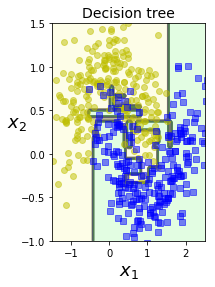

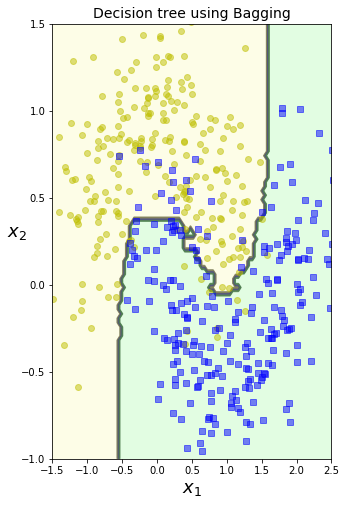

<Figure size 792x576 with 0 Axes>

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    plt.figure(figsize=(11,8))
    
plt.subplot(121)
plt.title("Decision tree", fontsize=14)
plot_decision_boundary(tree_clf, X, y)
plt.subplot(122)
plt.title("Decision tree using Bagging", fontsize=14)
plot_decision_boundary(bag_clf, X, y)
plt.show()